# Mutual Fund & ETFs Analysis
---

# Part 4 - Modeling - Mutual Fund Alpha

For this model, we'll be predicting mutual fund 3-year alpha average using the selected features from previous notebook. 

## Content

1. [Model Preparation](#Model-Preparation)
2. [Cross Validation](#Cross-Validation)
3. [Modeling](#Modeling)
4. [Result](#Result)
5. [Tuning](#Tuning)
6. [Feature Importance](#Feature-Importance)

## Links to Other Notebooks

- [Part 1: Data Cleaning](Part_1_Cleaning.ipynb)
- [Part 2: Exploratory Data Analysis](Part_2_EDA.ipynb)
- [Part 3: Modeling: Mutual Fund v1](Part_3_Modeling_MF_v1.ipynb) - Mutual Fund Prediction of fund returns
- [Part 5: Modeling: ETFs v1](Part_5_Modeling_ETF_v1.ipynb) - ETF Prediction of fund returns
- [Part 6: Modeling: ETFs v2](Part_6_Modeling_ETF_v2.ipynb) - ETF Prediction of fund alpha
- [Part 7: Evaluation & Conclusion](Part_7_Conclusion.ipynb)

### Libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set display options
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 300)

### Load datasets

In [2]:
mutual_fund = pd.read_csv('../datasets/mutual_fund_processed.csv')

## Model Preparation

First, we'll set our X and y, and split the data using test size 20%. We'll scale data using StandardScaler as some of the columns were not normally distributed. 

We'll generate predictions using:
- **Supervised learning**: Linear regression, Lasso regression, Ridge regression
- **Clustering**: KNeighbors regressor
- **Ensemble learning**: Decision tree, Bagged tree, Random Forest, Adaptive Boosting, Support Vector, Gradient Boosting

In [3]:
X = mutual_fund.drop(columns=['fund_alpha_3years', 'year_to_date_return'])
y = mutual_fund['fund_alpha_3years']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
# Scaling the dataset

ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [6]:
# Instantiate models

lr = LinearRegression()
lasso = LassoCV(n_alphas=100)
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
bagged = BaggingRegressor()
random_forest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
support_vector = SVR()
gradient_boost = GradientBoostingRegressor()

## Cross Validation

Before we can build our models, we'll first need to ensure our models are reliable. We'll use the cross-validation technique to train several machine learning models on subsets of the dataset and evaluate them for any signs of overfitting.

In [7]:
# Testing linear regression model

lr_cv_scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr_cv_mean = lr_cv_scores.mean()
print(f"Linear Regression R2 cross-validation score: {lr_cv_mean}")
      
lr_cv_mse_scores = -cross_val_score(lr,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lr_cv_rmse_mean = np.sqrt(lr_cv_mse_scores.mean())
print(f"Linear regression RSME cross-validation score:' {lr_cv_rmse_mean}")

Linear Regression R2 cross-validation score: 0.5055009020026296
Linear regression RSME cross-validation score:' 3.5058877159660544


In [8]:
# Testing lasso model 

lasso_cv_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_cv_mean = lasso_cv_scores.mean()
print(f"Lasso R2 cross-validation score: {lasso_cv_mean}")

lasso_cv_mse_scores = -cross_val_score(lasso,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lasso_cv_rmse_mean = np.sqrt(lasso_cv_mse_scores.mean())
print(f"Lasso RSME cross-validation score: {lasso_cv_rmse_mean}")

Lasso R2 cross-validation score: 0.5052454780458479
Lasso RSME cross-validation score: 3.506821091144236


In [9]:
# Testing ridge model

ridge_cv_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_cv_mean = ridge_cv_scores.mean()
print(f"Ridge R2 cross-validation score: {ridge_cv_mean}")

ridge_cv_mse_scores = -cross_val_score(ridge, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
ridge_cv_rmse_mean = np.sqrt(ridge_cv_mse_scores.mean())
print(f"Ridge RSME cross-validation score: {ridge_cv_rmse_mean}")

Ridge R2 cross-validation score: 0.5055171119507188
Ridge RSME cross-validation score: 3.505854073203877


In [10]:
# Testing KNN model

knn_cv_scores = cross_val_score(knn, X_train_sc, y_train, cv=5)
knn_cv_mean = knn_cv_scores.mean()
print(f"K-Nearest Neighbor R2 cross-validation score: {knn_cv_mean}")

knn_cv_mse_scores = -cross_val_score(knn, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
knn_cv_rmse_mean = np.sqrt(knn_cv_mse_scores.mean())
print(f"K-Nearest Neighbor RSME cross-validation score: {knn_cv_rmse_mean}")

K-Nearest Neighbor R2 cross-validation score: 0.8499272767419074
K-Nearest Neighbor RSME cross-validation score: 1.9316909682517533


In [11]:
# Testing decision tree model

decision_tree_cv_scores = cross_val_score(decision_tree, X_train_sc, y_train, cv=5)
decision_tree_cv_mean = decision_tree_cv_scores.mean()
print(f"Decision Tree R2 cross-validation score: {decision_tree_cv_mean}")

decision_tree_cv_mse_scores = -cross_val_score(decision_tree, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
decision_tree_cv_rmse_mean = np.sqrt(decision_tree_cv_mse_scores.mean())
print(f"Decision RSME cross-validation score: {decision_tree_cv_rmse_mean}")

Decision Tree R2 cross-validation score: 0.8628870192373084
Decision RSME cross-validation score: 1.8577878057549668


In [12]:
# Testing bagged tree model

bagged_cv_scores = cross_val_score(bagged, X_train_sc, y_train, cv=5)
bagged_cv_mean = bagged_cv_scores.mean()
print(f"Bagged Tree R2 cross-validation score: {bagged_cv_mean}")

bagged_cv_mse_scores = -cross_val_score(bagged, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
bagged_cv_rmse_mean = np.sqrt(bagged_cv_mse_scores.mean())
print(f"Bagged Tree RSME cross-validation score: {bagged_cv_rmse_mean}")

Bagged Tree R2 cross-validation score: 0.9128757005868602
Bagged Tree RSME cross-validation score: 1.4776979338448661


In [13]:
# Testing random forest model

random_forest_cv_scores = cross_val_score(random_forest, X_train_sc, y_train, cv=5)
random_forest_cv_mean = random_forest_cv_scores.mean()
print(f"Random Forest R2 cross-validation score: {random_forest_cv_mean}")

random_forest_cv_mse_scores = -cross_val_score(random_forest, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
random_forest_cv_rmse_mean = np.sqrt(random_forest_cv_mse_scores.mean())
print(f"Random Forest RSME cross-validation score: {random_forest_cv_rmse_mean}")

Random Forest R2 cross-validation score: 0.9290957597592001
Random Forest RSME cross-validation score: 1.3381792802994863


In [14]:
# Testing adaptive boosting model

adaboost_cv_scores = cross_val_score(adaboost, X_train_sc, y_train, cv=5)
adaboost_cv_mean = adaboost_cv_scores.mean()
print(f"Adaptive Boosting R2 cross-validation score: {adaboost_cv_mean}")

adaboost_cv_mse_scores = -cross_val_score(adaboost, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
adaboost_cv_rmse_mean = np.sqrt(adaboost_cv_mse_scores.mean())
print(f"Adaptive Boosting RSME cross-validation score: {adaboost_cv_rmse_mean}")

Adaptive Boosting R2 cross-validation score: 0.4980248207658725
Adaptive Boosting RSME cross-validation score: 3.5400395386674774


In [15]:
# Testing support vector model

support_vector_cv_scores = cross_val_score(support_vector, X_train_sc, y_train, cv=5)
support_vector_cv_mean = support_vector_cv_scores.mean()
print(f"Support Vector R2 cross-validation score: {adaboost_cv_mean}")

support_vector_cv_mse_scores = -cross_val_score(support_vector, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
support_vector_cv_rmse_mean = np.sqrt(support_vector_cv_mse_scores.mean())
print(f"Support Vector RSME cross-validation score: {support_vector_cv_rmse_mean}")

Support Vector R2 cross-validation score: 0.4980248207658725
Support Vector RSME cross-validation score: 2.4964983150979605


In [16]:
# Testing gradient boosting model

gradient_boost_cv_scores = cross_val_score(gradient_boost, X_train_sc, y_train, cv=5)
gradient_boost_cv_mean = gradient_boost_cv_scores.mean()
print(f"Gradient Boosting R2 cross-validation score: {gradient_boost_cv_mean}")

gradient_boost_cv_mse_scores = -cross_val_score(gradient_boost, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
gradient_boost_cv_rmse_mean = np.sqrt(gradient_boost_cv_mse_scores.mean())
print(f"Gradient Boosting RSME cross-validation score: {gradient_boost_cv_rmse_mean}")

Gradient Boosting R2 cross-validation score: 0.7732515910816035
Gradient Boosting RSME cross-validation score: 2.379310475814586


## Modeling

Once we have our cross-validation scores, we'll start building our models:

### Linear Regression

In [17]:
lr.fit(X_train_sc, y_train)

print("Linear Regression:")
print()
linear_train_r = lr.score(X_train_sc,y_train)
print(f"R2 for training dataset: {linear_train_r}")
linear_test_r = lr.score(X_test_sc,y_test)
print(f"R2 validation dataset: {linear_test_r}")
print(f"R2 for cross-validation sets: {lr_cv_mean}")
print()
linear_train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_sc)))
print(f"RMSE for training dataset: {linear_train_rmse}")
linear_test_rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test_sc)))
print(f"RMSE for validation dataset: {linear_test_rmse}")
print(f"RMSE for cross-validation sets: {lr_cv_rmse_mean}")

Linear Regression:

R2 for training dataset: 0.5092646118189204
R2 validation dataset: 0.49411523590313655
R2 for cross-validation sets: 0.5055009020026296

RMSE for training dataset: 3.492972517306813
RMSE for validation dataset: 3.6494825156031943
RMSE for cross-validation sets: 3.5058877159660544


### Lasso Regression

In [18]:
lasso.fit(X_train_sc, y_train)

lasso_alpha = lasso.alpha_
lasso_alpha

0.0028894454041332946

In [19]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=0.0028894454041332946)

In [20]:
print("Lasso Regression:")
print()
lasso_train_r = lasso.score(X_train_sc,y_train)
print(f"R2 for training dataset: {lasso_train_r}")
lasso_test_r = lasso.score(X_test_sc,y_test)
print(f"R2 validation dataset: {lasso_test_r}")
print(f"R2 for cross-validation sets: {lasso_cv_mean}")
print()
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc)))
print(f"RMSE for training dataset: {lasso_train_rmse}")
lasso_test_rmse = np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_sc)))
print(f"RMSE for validation dataset: {lasso_test_rmse}")
print(f"RMSE for cross-validation sets: {lasso_cv_rmse_mean}")

Lasso Regression:

R2 for training dataset: 0.509244696178262
R2 validation dataset: 0.49410359024044626
R2 for cross-validation sets: 0.5052454780458479

RMSE for training dataset: 3.493043394689393
RMSE for validation dataset: 3.6495245216100907
RMSE for cross-validation sets: 3.506821091144236


### Ridge Regression

In [21]:
ridge.fit(X_train_sc,y_train)

ridge_alpha = ridge.alpha_
ridge_alpha

89.44444444444444

In [22]:
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train_sc, y_train)

Ridge(alpha=89.44444444444444)

In [23]:
print("Ridge Regression:")
print()
ridge_train_r = ridge.score(X_train_sc,y_train)
print(f"R2 for training dataset: {ridge_train_r}")
ridge_test_r = ridge.score(X_test_sc,y_test)
print(f"R2 validation dataset: {ridge_test_r}")
print(f"R2 for cross-validation sets: {ridge_cv_mean}")
print()
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc)))
print(f"RMSE for training dataset: {ridge_train_rmse}")
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_sc)))
print(f"RMSE for validation dataset: {ridge_test_rmse}")
print(f"RMSE for cross-validation sets: {ridge_cv_rmse_mean}")

Ridge Regression:

R2 for training dataset: 0.5092470447048643
R2 validation dataset: 0.4940655702807166
R2 for cross-validation sets: 0.5055171119507188

RMSE for training dataset: 3.493035036638969
RMSE for validation dataset: 3.64966165657071
RMSE for cross-validation sets: 3.505854073203877


### K-Nearest Neighbor

In [24]:
knn.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [25]:
print("K-Nearest Neighbor:")
print()
knn_train_r = knn.score(X_train_sc,y_train)
print(f"R2 for training dataset: {knn_train_r}")
knn_test_r = knn.score(X_test_sc,y_test)
print(f"R2 validation dataset: {knn_test_r}")
print(f"R2 for cross-validation sets: {knn_cv_mean}")
print()
knn_train_rmse = np.sqrt(mean_squared_error(y_train, knn.predict(X_train_sc)))
print(f"RMSE for training dataset: {knn_train_rmse}")
knn_test_rmse = np.sqrt(mean_squared_error(y_test,knn.predict(X_test_sc)))
print(f"RMSE for validation dataset: {knn_test_rmse}")
print(f"RMSE for cross-validation sets: {knn_cv_rmse_mean}")

K-Nearest Neighbor:

R2 for training dataset: 0.9248710190624244
R2 validation dataset: 0.8791998519828044
R2 for cross-validation sets: 0.8499272767419074

RMSE for training dataset: 1.36670640286479
RMSE for validation dataset: 1.7833608181968092
RMSE for cross-validation sets: 1.9316909682517533


### Decision Tree

In [26]:
decision_tree.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [27]:
print("Decision Tree:")
print()
decision_tree_train_r = decision_tree.score(X_train_sc,y_train)
print(f"R2 for training dataset: {decision_tree_train_r}")
decision_tree_test_r = decision_tree.score(X_test_sc,y_test)
print(f"R2 validation dataset: {decision_tree_test_r}")
print(f"R2 for cross-validation sets: {decision_tree_cv_mean}")
print()
decision_tree_train_rmse = np.sqrt(mean_squared_error(y_train, decision_tree.predict(X_train_sc)))
print(f"RMSE for training dataset: {decision_tree_train_rmse}")
decision_tree_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test_sc)))
print(f"RMSE for validation dataset: {decision_tree_test_rmse}")
print(f"RMSE for cross-validation sets: {decision_tree_cv_rmse_mean}")

Decision Tree:

R2 for training dataset: 0.9999994347531299
R2 validation dataset: 0.883529361039217
R2 for cross-validation sets: 0.8628870192373084

RMSE for training dataset: 0.0037487852557409854
RMSE for validation dataset: 1.7511111623725057
RMSE for cross-validation sets: 1.8577878057549668


### Bagged Tree

In [28]:
bagged.fit(X_train_sc, y_train)

BaggingRegressor()

In [29]:
print("Bagged Tree:")
print()
bagged_train_r = bagged.score(X_train_sc,y_train)
print(f"R2 for training dataset: {bagged_train_r}")
bagged_test_r = bagged.score(X_test_sc,y_test)
print(f"R2 validation dataset: {bagged_test_r}")
print(f"R2 for cross-validation sets: {bagged_cv_mean}")
print()
bagged_train_rmse = np.sqrt(mean_squared_error(y_train, bagged.predict(X_train_sc)))
print(f"RMSE for training dataset: {bagged_train_rmse}")
bagged_test_rmse = np.sqrt(mean_squared_error(y_test, bagged.predict(X_test_sc)))
print(f"RMSE for validation dataset: {bagged_test_rmse}")
print(f"RMSE for cross-validation sets: {bagged_cv_rmse_mean}")

Bagged Tree:

R2 for training dataset: 0.9866876647381974
R2 validation dataset: 0.9234650929459993
R2 for cross-validation sets: 0.9128757005868602

RMSE for training dataset: 0.5753056024109697
RMSE for validation dataset: 1.4194995754535564
RMSE for cross-validation sets: 1.4776979338448661


### Random Forest

In [30]:
random_forest.fit(X_train_sc, y_train)

RandomForestRegressor()

In [31]:
print("Random Forest:")
print()
random_forest_train_r = random_forest.score(X_train_sc,y_train)
print(f"R2 for training dataset: {random_forest_train_r}")
random_forest_test_r = random_forest.score(X_test_sc,y_test)
print(f"R2 validation dataset: {random_forest_test_r}")
print(f"R2 for cross-validation sets: {random_forest_cv_mean}")
print()
random_forest_train_rmse = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train_sc)))
print(f"RMSE for training dataset: {random_forest_train_rmse}")
random_forest_test_rmse = np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test_sc)))
print(f"RMSE for validation dataset: {random_forest_test_rmse}")
print(f"RMSE for cross-validation sets: {random_forest_cv_rmse_mean}")

Random Forest:

R2 for training dataset: 0.9918737715707989
R2 validation dataset: 0.9320219618645538
R2 for cross-validation sets: 0.9290957597592001

RMSE for training dataset: 0.44948581752929834
RMSE for validation dataset: 1.3377957154280835
RMSE for cross-validation sets: 1.3381792802994863


### Adaptive Boosting

In [32]:
adaboost.fit(X_train_sc, y_train)

AdaBoostRegressor()

In [33]:
print("Adaptive Boosting:")
print()
adaboost_train_r = adaboost.score(X_train_sc,y_train)
print(f"R2 for training dataset: {adaboost_train_r}")
adaboost_test_r = adaboost.score(X_test_sc,y_test)
print(f"R2 validation dataset: {adaboost_test_r}")
print(f"R2 for cross-validation sets: {adaboost_cv_mean}")
print()
adaboost_train_rmse = np.sqrt(mean_squared_error(y_train, adaboost.predict(X_train_sc)))
print(f"RMSE for training dataset: {adaboost_train_rmse}")
adaboost_test_rmse = np.sqrt(mean_squared_error(y_test, adaboost.predict(X_test_sc)))
print(f"RMSE for validation dataset: {adaboost_test_rmse}")
print(f"RMSE for cross-validation sets: {adaboost_cv_rmse_mean}")

Adaptive Boosting:

R2 for training dataset: 0.5092427463921232
R2 validation dataset: 0.5292656531056512
R2 for cross-validation sets: 0.4980248207658725

RMSE for training dataset: 3.493050333667714
RMSE for validation dataset: 3.5204115013595776
RMSE for cross-validation sets: 3.5400395386674774


### Support Vector

In [34]:
support_vector.fit(X_train_sc, y_train)

SVR()

In [35]:
print("Support Vector:")
print()
support_vector_train_r = support_vector.score(X_train_sc,y_train)
print(f"R2 for training dataset: {support_vector_train_r}")
support_vector_test_r = support_vector.score(X_test_sc,y_test)
print(f"R2 validation dataset: {support_vector_test_r}")
print(f"R2 for cross-validation sets: {support_vector_cv_mean}")
print()
support_vector_train_rmse = np.sqrt(mean_squared_error(y_train, support_vector.predict(X_train_sc)))
print(f"RMSE for training dataset: {support_vector_train_rmse}")
support_vector_test_rmse = np.sqrt(mean_squared_error(y_test, support_vector.predict(X_test_sc)))
print(f"RMSE for validation dataset: {support_vector_test_rmse}")
print(f"RMSE for cross-validation sets: {support_vector_cv_rmse_mean}")

Support Vector:

R2 for training dataset: 0.7781462647844567
R2 validation dataset: 0.7677216248391875
R2 for cross-validation sets: 0.7496316971328858

RMSE for training dataset: 2.3485772655782573
RMSE for validation dataset: 2.472918918838643
RMSE for cross-validation sets: 2.4964983150979605


### Gradient Boosting

In [36]:
gradient_boost.fit(X_train_sc, y_train)

GradientBoostingRegressor()

In [37]:
print("Gradient Boosting:")
print()
gradient_boost_train_r = gradient_boost.score(X_train_sc,y_train)
print(f"R2 for training dataset: {gradient_boost_train_r}")
gradient_boost_test_r = gradient_boost.score(X_test_sc,y_test)
print(f"R2 validation dataset: {gradient_boost_test_r}")
print(f"R2 for cross-validation sets: {gradient_boost_cv_mean}")
print()
gradient_boost_train_rmse = np.sqrt(mean_squared_error(y_train, gradient_boost.predict(X_train_sc)))
print(f"RMSE for training dataset: {gradient_boost_train_rmse}")
gradient_boost_test_rmse = np.sqrt(mean_squared_error(y_test, gradient_boost.predict(X_test_sc)))
print(f"RMSE for validation dataset: {gradient_boost_test_rmse}")
print(f"RMSE for cross-validation sets: {gradient_boost_cv_rmse_mean}")

Gradient Boosting:

R2 for training dataset: 0.7952169481136393
R2 validation dataset: 0.7835298429513867
R2 for cross-validation sets: 0.7732515910816035

RMSE for training dataset: 2.2564124406779915
RMSE for validation dataset: 2.387286287781138
RMSE for cross-validation sets: 2.379310475814586


## Result

Now we'll compile the results into a dataframe for evaluation:

In [38]:
# Creating table of the results

results = pd.DataFrame(data=[["Linear", linear_train_r, linear_test_r, lr_cv_mean, linear_train_rmse, linear_test_rmse, lr_cv_rmse_mean],
                                ["Lasso", lasso_train_r, lasso_test_r, lasso_cv_mean, lasso_train_rmse, lasso_test_rmse, lasso_cv_rmse_mean],
                                ["Ridge", ridge_train_r, ridge_test_r, ridge_cv_mean, ridge_train_rmse, ridge_test_rmse, ridge_cv_rmse_mean],
                                ["K-Nearest Neighbor", knn_train_r, knn_test_r, knn_cv_mean, knn_train_rmse, knn_test_rmse, knn_cv_rmse_mean],
                                ["Decision Tree", decision_tree_train_r, decision_tree_test_r, decision_tree_cv_mean, decision_tree_train_rmse, decision_tree_test_rmse, decision_tree_cv_rmse_mean],
                                ["Bagged Tree", bagged_train_r, bagged_test_r, bagged_cv_mean, bagged_train_rmse, bagged_test_rmse, bagged_cv_rmse_mean],
                                ["Random Forest", random_forest_train_r, random_forest_test_r, random_forest_cv_mean, random_forest_train_rmse, random_forest_test_rmse, random_forest_cv_rmse_mean],
                                ["Adaptive Boosting", adaboost_train_r, adaboost_test_r, adaboost_cv_mean, adaboost_train_rmse, adaboost_test_rmse, adaboost_cv_rmse_mean],
                                ["Support Vector", support_vector_train_r, support_vector_test_r, support_vector_cv_mean, support_vector_train_rmse, support_vector_test_rmse, support_vector_cv_rmse_mean],
                                ["Gradient Boosting", gradient_boost_train_r, gradient_boost_test_r, gradient_boost_cv_mean, gradient_boost_train_rmse, gradient_boost_test_rmse, gradient_boost_cv_rmse_mean]],
                                columns=['Model', 'R2 Train Set','R2 Test Set', 'R2 Cross-Val', 'RMSE Train Set','RMSE Test Set', 'RMSE Cross-Val'])

results

,Model,R2 Train Set,R2 Test Set,R2 Cross-Val,RMSE Train Set,RMSE Test Set,RMSE Cross-Val
0,Linear,0.509265,0.494115,0.505501,3.492973,3.649483,3.505888
1,Lasso,0.509245,0.494104,0.505245,3.493043,3.649525,3.506821
2,Ridge,0.509247,0.494066,0.505517,3.493035,3.649662,3.505854
3,K-Nearest Neighbor,0.924871,0.879200,0.849927,1.366706,1.783361,1.931691
4,Decision Tree,0.999999,0.883529,0.862887,0.003749,1.751111,1.857788
5,Bagged Tree,0.986688,0.923465,0.912876,0.575306,1.419500,1.477698
6,Random Forest,0.991874,0.932022,0.929096,0.449486,1.337796,1.338179
7,Adaptive Boosting,0.509243,0.529266,0.498025,3.493050,3.520412,3.540040
8,Support Vector,0.778146,0.767722,0.749632,2.348577,2.472919,2.496498
9,Gradient Boosting,0.795217,0.783530,0.773252,2.256412,2.387286,2.379310


Based on the results, Random Forest has shown the highest R2 and lowest RMSE cross validation score. The training and testing scores are also more consistent compared to the other models. The next best models are bagged tree and decision tree, which we will ignore as they have a tendency to overfit. 

Next, we'll perform a GridSearch to tune the Random Forest model and hope to achieve better results.

## Tuning

GridSearch uses different combination of specified hyperparameters to calculate the performance of each combination, and then selecting the best value for the hyperparameters. This allows us to find the optimized values for our models so that we can maximize our prediction accuracy.

In [39]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, None],
    'n_jobs': [-1],
    'verbose': [2],
}

rf_tuned = GridSearchCV(random_forest, rf_params)
rf_tuned.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s

building tree 1 of 200
building tree 2 of 200building tree 3 of 200
building tree 4 of 200

building tree 5 of 200building tree 6 of 200
building tree 7 of 200

building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200building tree 21 of 200

building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s


building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200building tree 53 of 200

building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s


building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200building tree 190 of 200

building tree 191 of 200
building tree 192 of 200
building tree 193 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.9s finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, None], 'n_estimators': [100, 200],
                         'n_jobs': [-1], 'verbose': [2]})

In [40]:
rf_tuned.best_params_

{'max_depth': None, 'n_estimators': 200, 'n_jobs': -1, 'verbose': 2}

In [41]:
rf_tuned.best_score_

0.929124280843285

In [42]:
print("Random Forest Post-Tuning:")
print()
rf_tuned_train_r = rf_tuned.score(X_train_sc,y_train)
print(f"R2 for training dataset: {rf_tuned_train_r}")
rf_tuned_test_r = rf_tuned.score(X_test_sc,y_test)
print(f"R2 validation dataset: {rf_tuned_test_r}")

print()
rf_tuned_train_rmse = np.sqrt(mean_squared_error(y_train, rf_tuned.predict(X_train_sc)))
print(f"RMSE for training dataset: {rf_tuned_train_rmse}")
rf_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned.predict(X_test_sc)))
print(f"RMSE for validation dataset: {rf_tuned_test_rmse}")


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


Random Forest Post-Tuning:

R2 for training dataset: 0.9920904579128839
R2 validation dataset: 0.9303180584098657



[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


RMSE for training dataset: 0.4434525439730243
RMSE for validation dataset: 1.354458206891785


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


Based on the tuned model, we can see that all of the scores across the board has improved! The R2 is higher and the RMSE values are much lower too. 

So let's take a look at the prediction accuracy:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


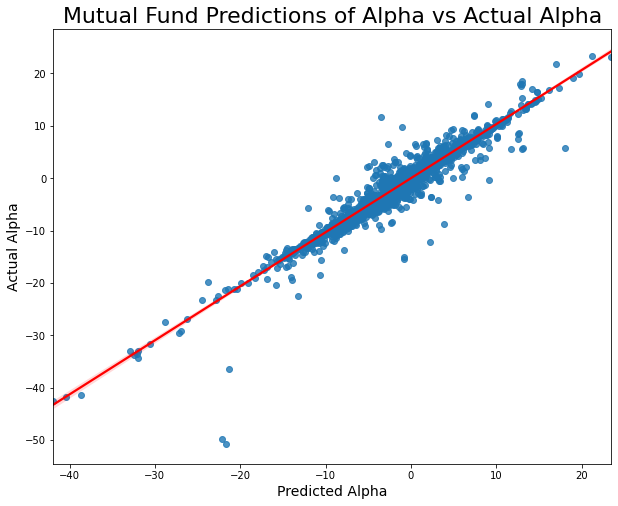

In [43]:
rf_preds = rf_tuned.predict(X_test_sc)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_sc, x=rf_preds, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted Alpha', fontsize=14)
plt.ylabel('Actual Alpha', fontsize=14)
plt.title('Mutual Fund Predictions of Alpha vs Actual Alpha', fontsize=22)
plt.show()

Overall the alpha predictions are quite close to the actual alpha values, apart from a few outliers. This model has a better accuracy (92.9%) than the prediction of YTD returns (92.5%).

## Feature Importance

Using the tuned model, we've identified the most important features in the prediction model:

In [44]:
feature = rf_tuned.best_estimator_.feature_importances_
sorted_indices = np.argsort(feature)[::-1]
 
feature_labels = mutual_fund.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature_labels[sorted_indices[f]],
                            feature[sorted_indices[f]]))

 1) investment_type_Blend          0.145469
 2) morningstar_overall_rating     0.115115
 3) asset_stocks                   0.101413
 4) fund_alpha_3years              0.090612
 5) fund_sector_energy             0.075464
 6) fund_sector_industrials        0.042675
 7) investment_type_Value          0.035545
 8) size_type_Medium               0.032941
 9) morningstar_risk_rating        0.032152
10) fund_sector_technology         0.030264
11) fund_sector_financial_services 0.026552
12) esg_score                      0.023323
13) investment_type_Growth         0.021619
14) fund_bond_duration             0.020528
15) fund_price_earning_ratio       0.018746
16) fund_sector_healthcare         0.017056
17) fund_sector_basic_materials    0.014743
18) annual_holdings_turnover       0.014237
19) year_to_date_return            0.014174
20) asset_cash                     0.013443
21) fund_bonds_b                   0.012924
22) fund_sector_consumer_cyclical  0.012579
23) fund_sector_utilities       

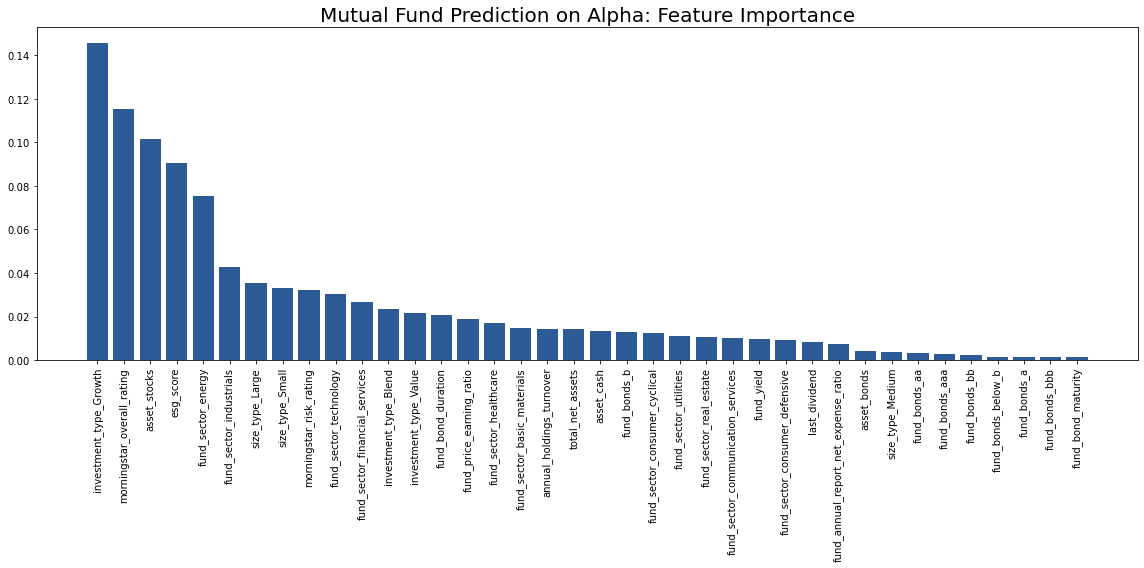

In [45]:
plt.figure(figsize=(16,8))
plt.title('Mutual Fund Prediction on Alpha: Feature Importance', size=20)
plt.bar(range(X_train.shape[1]), feature[sorted_indices], align='center', color='#2c5a94')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Top 10 features**: Investment type (Growth), Morningstar overall and risk ratings, stocks asset breakdown, ESG score, fund sectors (energy, industrials, technology), Investment size (Large, Small)